# Required Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

path = "/kaggle/input/chest-xray-augmented-2/Chest-Xray-Augmented-2"

train_path = path+'/train'
test_path = path+'/test'

os.listdir(path)

['test', 'train']

In [ ]:
train_norm = len(os.listdir(train_path+'/NORMAL'))
train_pne = len(os.listdir(train_path+'/PNEUMONIA'))
print("Total number of images in train set", (train_norm+train_pne))

Total number of images in train set 6541


In [ ]:
test_norm = len(os.listdir(test_path+'/NORMAL'))
test_pne = len(os.listdir(test_path+'/PNEUMONIA'))
print("Total number of images in test set", (test_norm+test_pne))

Total number of images in test set 1414


In [ ]:
os.listdir(train_path)

['PNEUMONIA', 'NORMAL']

In [ ]:
# Generate data paths with labels
data_dir = train_path
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)
df

,filepaths,labels
0,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,PNEUMONIA
1,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,PNEUMONIA
2,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,PNEUMONIA
3,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,PNEUMONIA
4,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,PNEUMONIA
...,...,...
6536,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,NORMAL
6537,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,NORMAL
6538,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,NORMAL
6539,/kaggle/input/chest-xray-augmented-2/Chest-Xra...,NORMAL


# A function for displaying images

In [ ]:
def plot_image(path, title):
    image_filenames = os.listdir(path)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(path + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

# Read an image from each class and display that

### Normal image

(208, 176, 3)
(208, 176, 3)
(208, 176, 3)
(256, 256, 3)


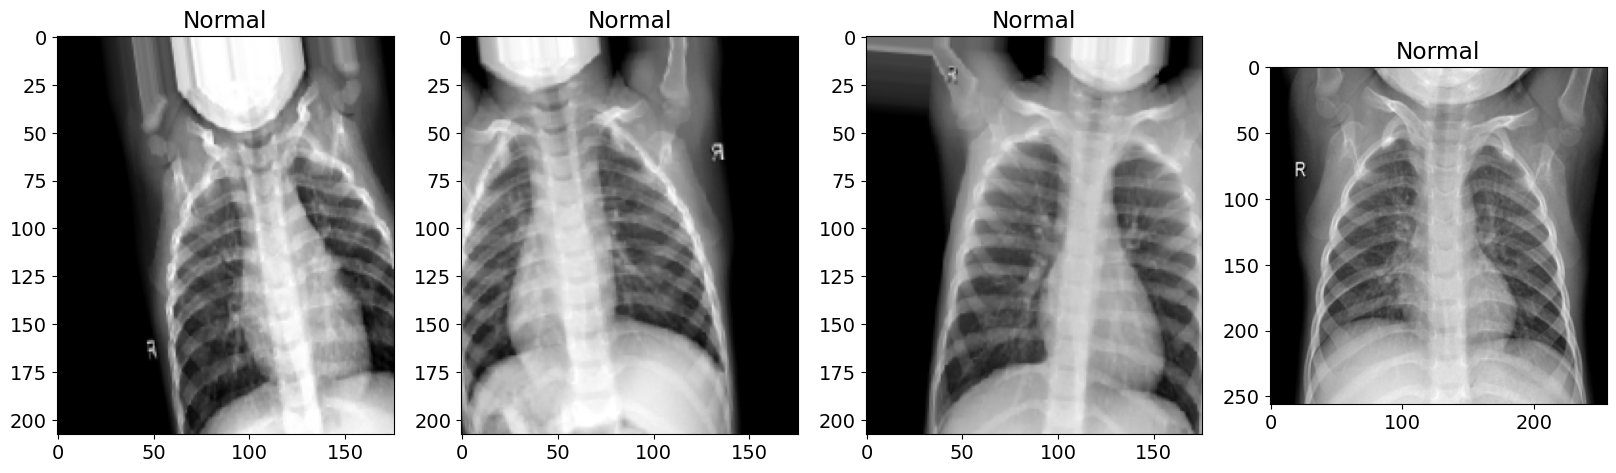

In [ ]:
image_folder_path = train_path + '/NORMAL'
plot_image(image_folder_path, "Normal")

### Pneumonia image

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


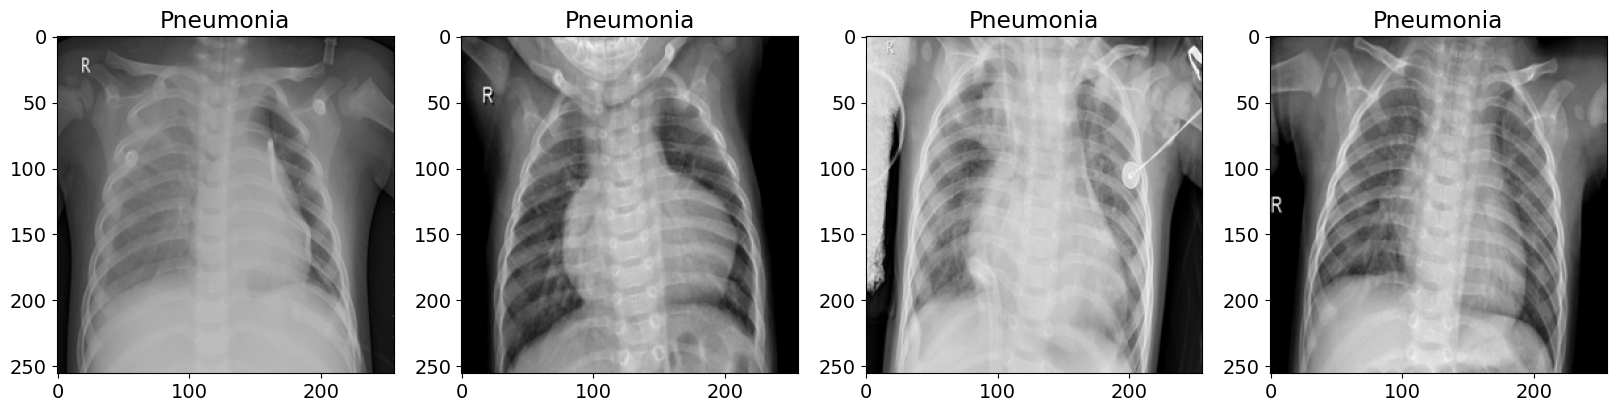

In [ ]:
image_folder_path = train_path + '/PNEUMONIA'
plot_image(image_folder_path, "Pneumonia")

In [ ]:
image_shape = (128,128,3)

# ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
image_gen.flow_from_directory(train_path)

Found 6541 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 1414 images belonging to 2 classes.


# Train and Test gen

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False)

Found 6541 images belonging to 2 classes.
Found 1414 images belonging to 2 classes.


# 1. CNN Model

In [ ]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile the model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit the model

In [ ]:
results = model.fit(train_image_gen, steps_per_epoch=300,epochs=20,
                              validation_data = test_image_gen)

Epoch 1/20
300/300 [==============================] - 40s 133ms/step - loss: 0.3679 - accuracy: 0.8485 - val_loss: 0.4416 - val_accuracy: 0.8182
Epoch 2/20
300/300 [==============================] - 40s 133ms/step - loss: 0.3526 - accuracy: 0.8575 - val_loss: 0.4033 - val_accuracy: 0.8331
Epoch 3/20
300/300 [==============================] - 41s 135ms/step - loss: 0.3578 - accuracy: 0.8541 - val_loss: 0.4118 - val_accuracy: 0.8267
Epoch 4/20
300/300 [==============================] - 40s 133ms/step - loss: 0.3617 - accuracy: 0.8573 - val_loss: 0.3897 - val_accuracy: 0.8366
Epoch 5/20
300/300 [==============================] - 41s 135ms/step - loss: 0.3401 - accuracy: 0.8620 - val_loss: 0.4033 - val_accuracy: 0.8373
Epoch 6/20
300/300 [==============================] - 41s 137ms/step - loss: 0.3313 - accuracy: 0.8664 - val_loss: 0.3543 - val_accuracy: 0.8465
Epoch 7/20
300/300 [==============================] - 40s 134ms/step - loss: 0.3296 - accuracy: 0.8706 - val_loss: 0.3405 - val_ac

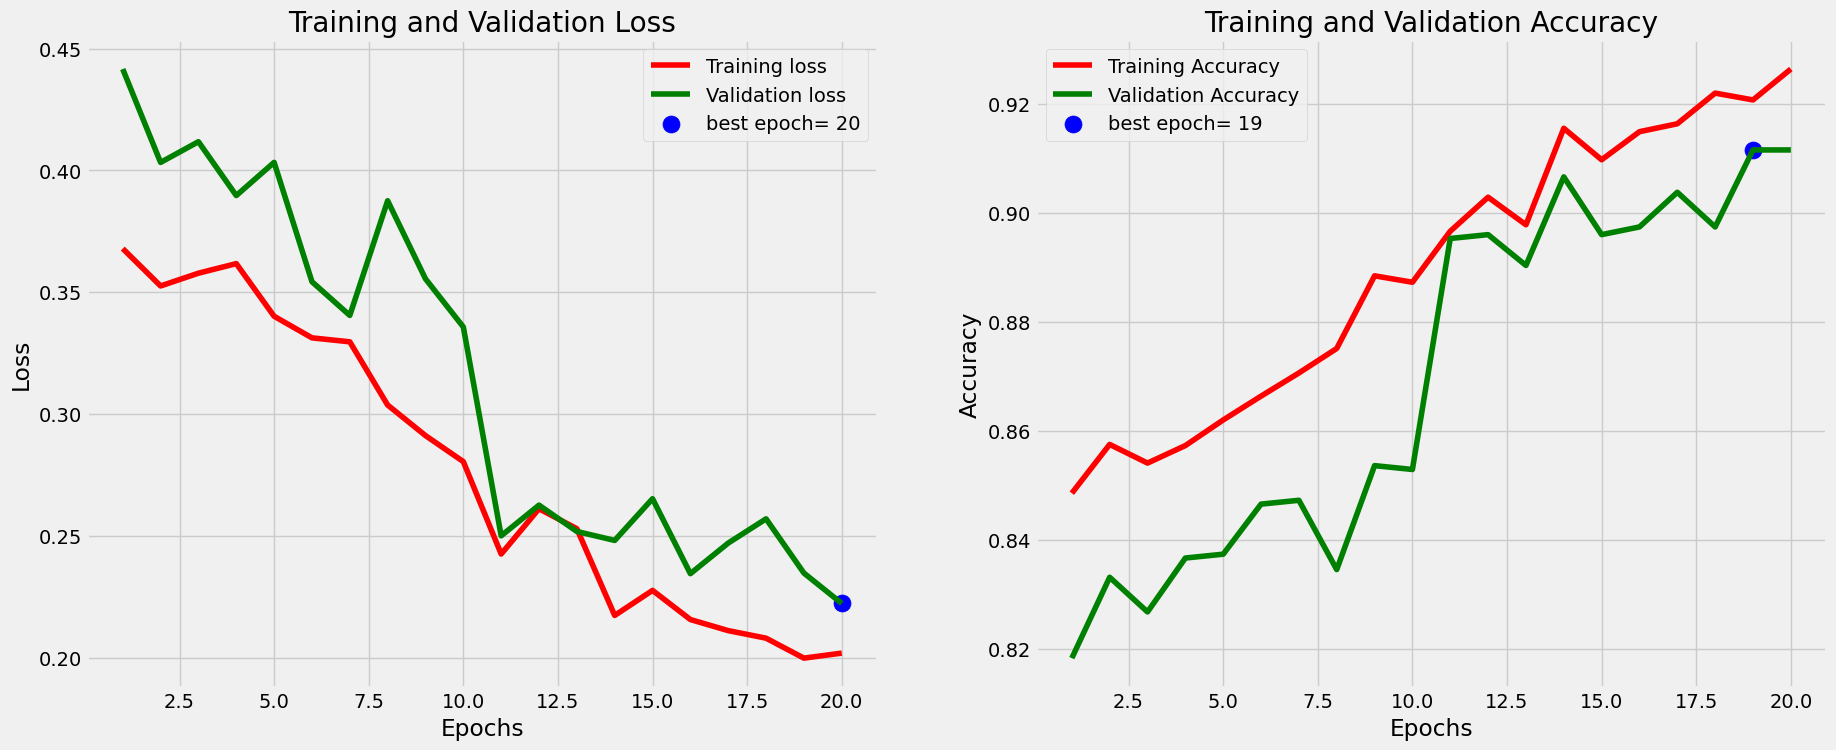

In [ ]:
 # Define needed variables
tr_acc = results.history['accuracy']
tr_loss = results.history['loss']
val_acc = results.history['val_accuracy']
val_loss = results.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate the mode

In [ ]:
model.evaluate(test_image_gen, verbose=0)

[0.2335023730993271, 0.9193776249885559]

## Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_image_gen)
y_pred = y_pred.round()
y_true = test_image_gen.classes
print(classification_report(y_true,y_pred))

89/89 [==============================] - 10s 108ms/step
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       633
           1       0.90      0.93      0.92       781

    accuracy                           0.91      1414
   macro avg       0.91      0.90      0.91      1414
weighted avg       0.91      0.91      0.91      1414



# **Confusion Matrix**

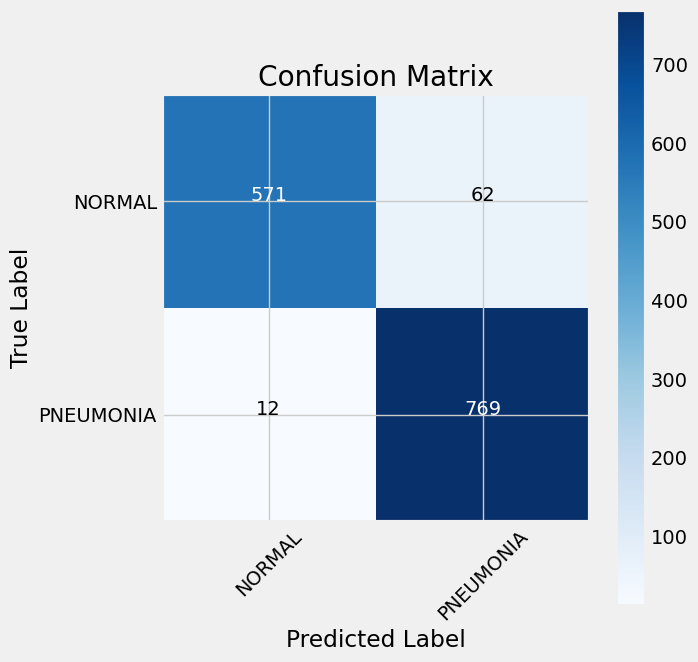

In [ ]:
import itertools
g_dict = test_image_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred)

plt.figure(figsize= (7, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# 2. VGG 16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

vgg = VGG16(input_shape=image_shape, weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(1, activation='sigmoid')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
modelvgg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = modelvgg.fit(train_image_gen, steps_per_epoch=300,epochs=20,
                              validation_data = test_image_gen)

Epoch 1/20
300/300 [==============================] - 44s 141ms/step - loss: 0.9173 - accuracy: 0.9149 - val_loss: 0.8483 - val_accuracy: 0.9257
Epoch 2/20
300/300 [==============================] - 42s 139ms/step - loss: 0.7357 - accuracy: 0.9414 - val_loss: 0.9126 - val_accuracy: 0.9392
Epoch 3/20
300/300 [==============================] - 42s 138ms/step - loss: 0.7842 - accuracy: 0.9454 - val_loss: 0.8781 - val_accuracy: 0.9356
Epoch 4/20
300/300 [==============================] - 42s 139ms/step - loss: 0.7334 - accuracy: 0.9512 - val_loss: 0.8361 - val_accuracy: 0.9356
Epoch 5/20
300/300 [==============================] - 41s 138ms/step - loss: 0.8173 - accuracy: 0.9487 - val_loss: 0.7269 - val_accuracy: 0.9470
Epoch 6/20
300/300 [==============================] - 41s 137ms/step - loss: 0.6264 - accuracy: 0.9552 - val_loss: 0.7861 - val_accuracy: 0.9441
Epoch 7/20
300/300 [==============================] - 41s 136ms/step - loss: 0.9991 - accuracy: 0.9438 - val_loss: 0.9787 - val_ac

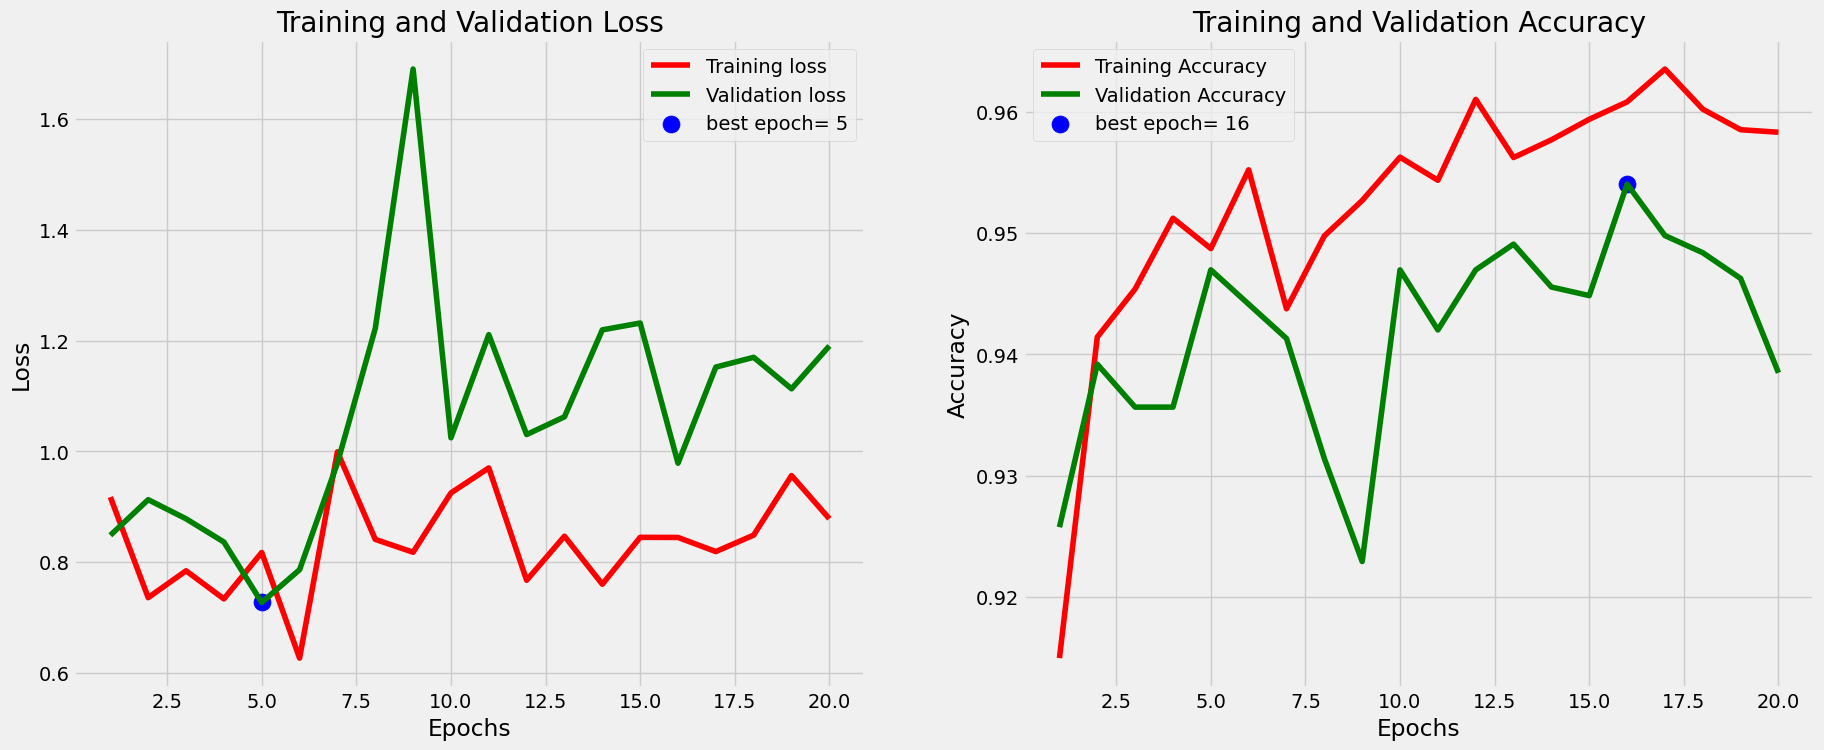

In [ ]:
 # Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = modelvgg.predict(test_image_gen)
y_pred = y_pred.round()
y_true = test_image_gen.classes
print(classification_report(y_true,y_pred))

89/89 [==============================] - 9s 103ms/step
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       633
           1       0.93      0.98      0.95       781

    accuracy                           0.95      1414
   macro avg       0.95      0.94      0.95      1414
weighted avg       0.95      0.95      0.95      1414



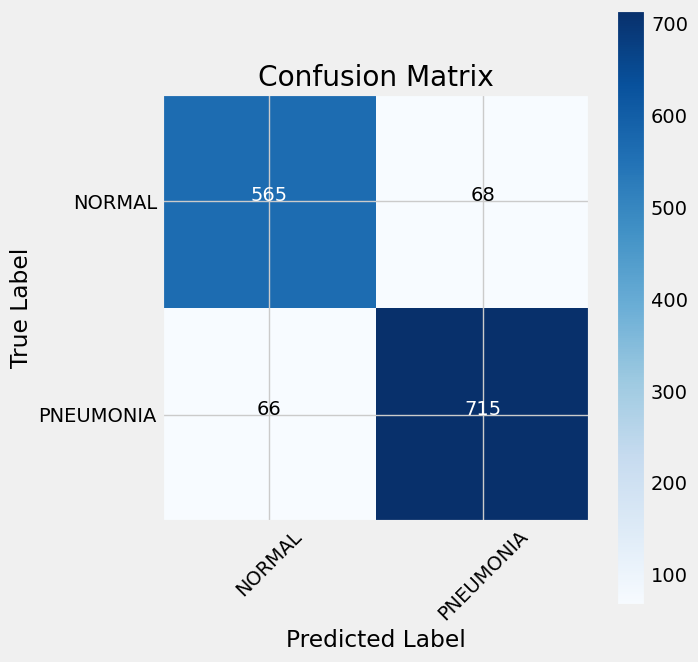

In [ ]:
import itertools
g_dict = test_image_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred)

plt.figure(figsize= (7, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# 3. ResNet50

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

res = ResNet50(input_shape=image_shape, weights='imagenet', include_top=False)
for layer in res.layers:
    layer.trainable = False
x = Flatten()(res.output)

prediction = Dense(1, activation='sigmoid')(x)

res50 = Model(inputs=res.input, outputs=prediction)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
res50.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
ResnetResult = res50.fit(train_image_gen, steps_per_epoch=100,epochs=10,
                              validation_data = test_image_gen)

Epoch 1/10
100/100 [==============================] - 20s 203ms/step - loss: 0.5750 - accuracy: 0.9512 - val_loss: 0.8057 - val_accuracy: 0.9215
Epoch 2/10
100/100 [==============================] - 21s 209ms/step - loss: 0.4922 - accuracy: 0.9463 - val_loss: 0.7287 - val_accuracy: 0.9130
Epoch 3/10
100/100 [==============================] - 20s 201ms/step - loss: 0.4503 - accuracy: 0.9500 - val_loss: 0.6605 - val_accuracy: 0.9434
Epoch 4/10
100/100 [==============================] - 20s 205ms/step - loss: 0.6073 - accuracy: 0.9449 - val_loss: 1.4206 - val_accuracy: 0.9024
Epoch 5/10
100/100 [==============================] - 20s 204ms/step - loss: 0.4134 - accuracy: 0.9600 - val_loss: 1.3817 - val_accuracy: 0.9059
Epoch 6/10
100/100 [==============================] - 20s 200ms/step - loss: 0.6331 - accuracy: 0.9494 - val_loss: 0.5627 - val_accuracy: 0.9455
Epoch 7/10
100/100 [==============================] - 21s 206ms/step - loss: 0.5061 - accuracy: 0.9581 - val_loss: 0.5746 - val_ac

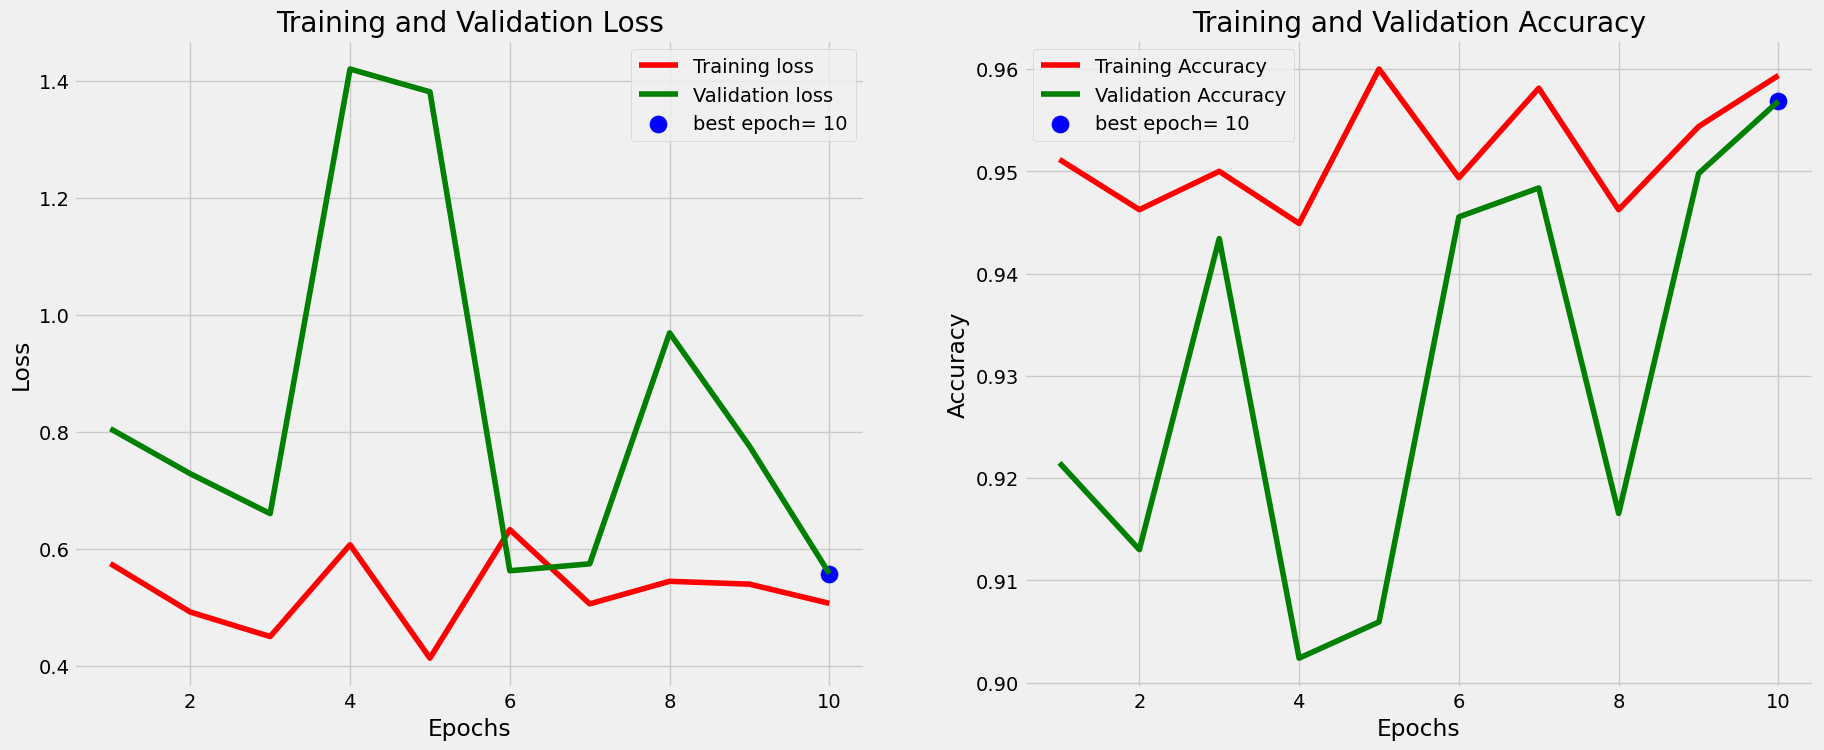

In [ ]:
 # Define needed variables
tr_acc = ResnetResult.history['accuracy']
tr_loss = ResnetResult.history['loss']
val_acc = ResnetResult.history['val_accuracy']
val_loss = ResnetResult.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = res50.predict(test_image_gen)
y_pred = y_pred.round()
y_true = test_image_gen.classes
print(classification_report(y_true,y_pred))

89/89 [==============================] - 10s 106ms/step
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       633
           1       0.96      0.88      0.92       781

    accuracy                           0.92      1414
   macro avg       0.91      0.92      0.91      1414
weighted avg       0.92      0.92      0.92      1414



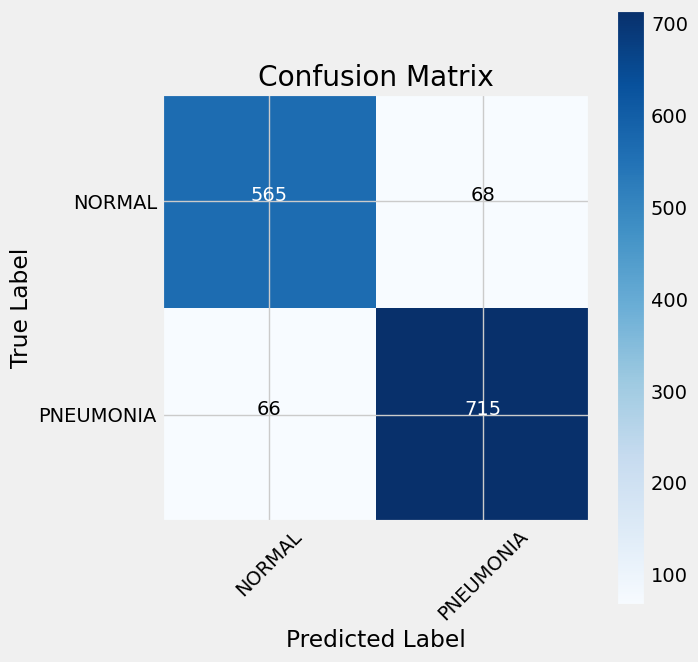

In [ ]:
import itertools
g_dict = test_image_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred)

plt.figure(figsize= (7, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# **4. MobilenetV2**

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Define MobileNet model
base_model = MobileNetV2(include_top=False, input_shape=image_shape, weights='imagenet')
x = Flatten()(base_model.output)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=x)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
t = model.fit(train_image_gen, steps_per_epoch=128, epochs=20, validation_data=train_image_gen)


Epoch 1/20
128/128 [==============================] - 58s 436ms/step - loss: 0.3945 - accuracy: 0.8601 - val_loss: 0.3082 - val_accuracy: 0.8989
Epoch 2/20
128/128 [==============================] - 54s 427ms/step - loss: 0.3287 - accuracy: 0.8979 - val_loss: 0.4238 - val_accuracy: 0.8433
Epoch 3/20
128/128 [==============================] - 59s 466ms/step - loss: 0.3107 - accuracy: 0.9051 - val_loss: 0.3276 - val_accuracy: 0.8999
Epoch 4/20
128/128 [==============================] - 54s 425ms/step - loss: 0.2697 - accuracy: 0.9111 - val_loss: 0.2580 - val_accuracy: 0.9208
Epoch 5/20
128/128 [==============================] - 55s 428ms/step - loss: 0.3407 - accuracy: 0.9125 - val_loss: 0.3101 - val_accuracy: 0.9012
Epoch 6/20
128/128 [==============================] - 54s 427ms/step - loss: 0.2831 - accuracy: 0.9023 - val_loss: 0.3054 - val_accuracy: 0.9110
Epoch 7/20
128/128 [==============================] - 62s 485ms/step - loss: 0.2834 - accuracy: 0.9258 - val_loss: 0.3686 - val_ac

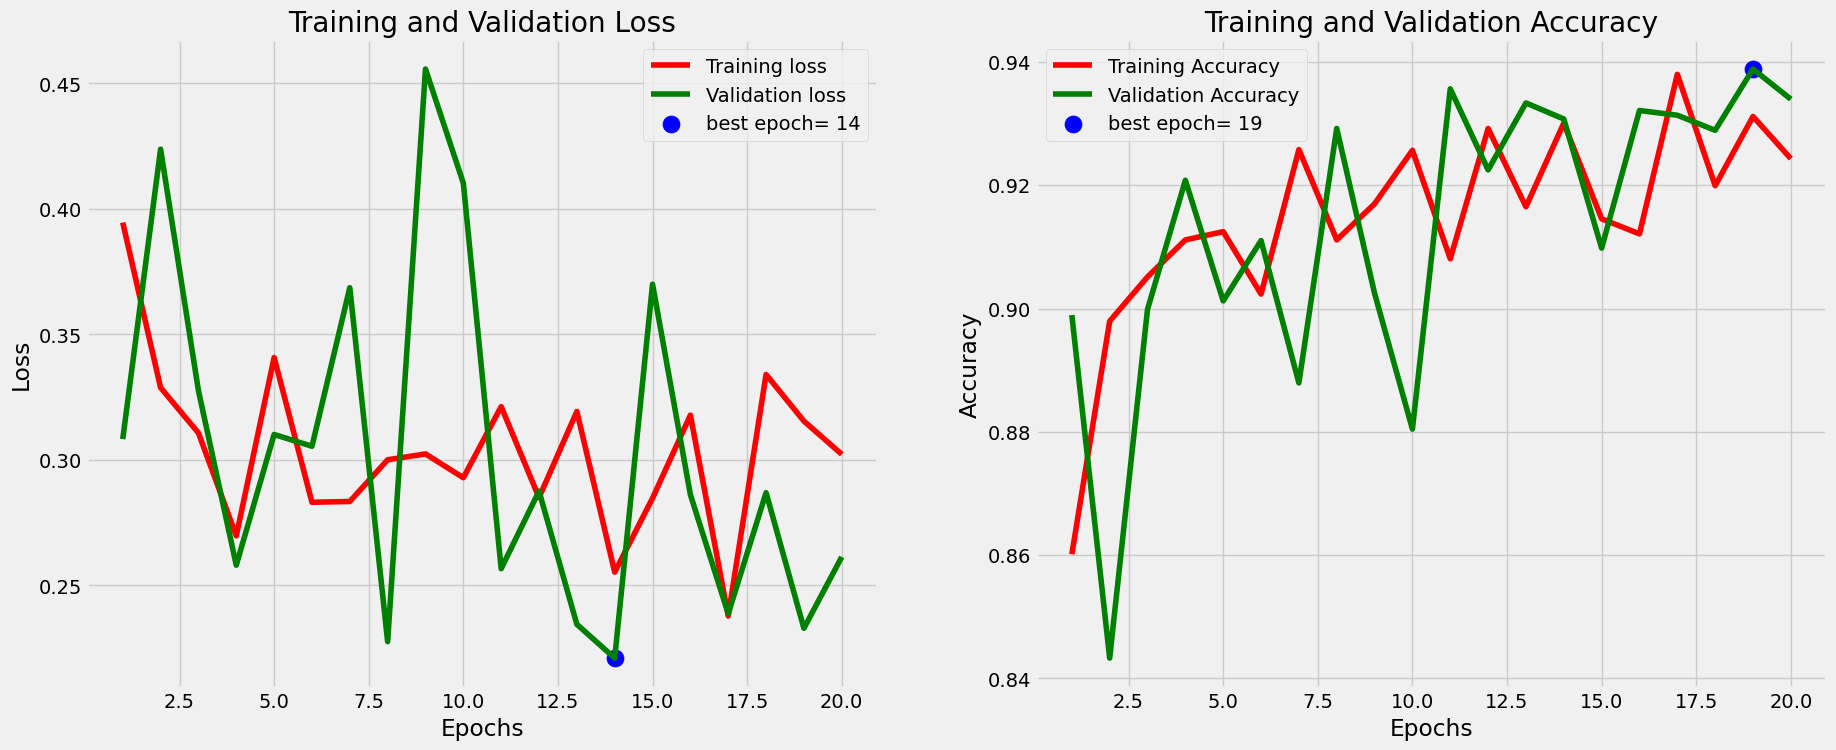

In [ ]:
 # Define needed variables
tr_acc = t.history['accuracy']
tr_loss = t.history['loss']
val_acc = t.history['val_accuracy']
val_loss = t.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_image_gen)
y_pred = y_pred.round()
y_true = test_image_gen.classes
print(classification_report(y_true,y_pred))

89/89 [==============================] - 10s 107ms/step
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       633
           1       0.91      0.92      0.91       781

    accuracy                           0.91      1414
   macro avg       0.90      0.90      0.90      1414
weighted avg       0.91      0.91      0.91      1414



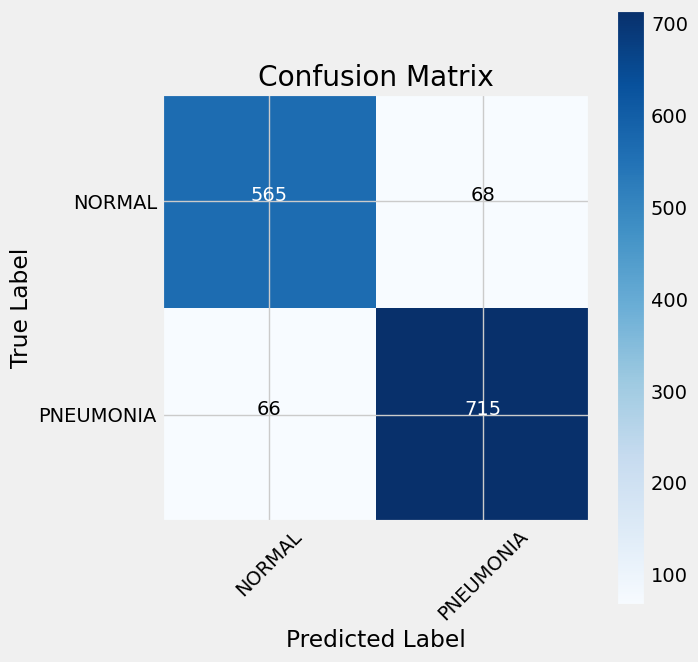

In [ ]:
import itertools
g_dict = test_image_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_image_gen.classes, y_pred)

plt.figure(figsize= (7, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()